<a href="https://colab.research.google.com/github/sarahJune1/BUS509_sachss/blob/main/notebooks/Module_9/Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats as stats
import math
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Module Nine: Hypothesis Testing

In this module, we will learn about hypothesis testing. This will allow us to test our assumptions and how we understand a population using the sample statistics. 


# Expenditure and Default Data
Description:

Cross-section data on the credit history for a sample of applicants for a type of credit card.

https://vincentarelbundock.github.io/Rdatasets/doc/AER/CreditCard.html


In [2]:
df = sm.datasets.get_rdataset("CreditCard", "AER").data

In [3]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


Market analyst wants to establish that the mean age for individuals who are rejected from credit card is less than 25 (μ < 25). It is assumed card applications age is normally distributed with a known population standard deviation of 10 years (σ = 10). Calculate at 95% significance level.

H<sub>0</sub>
 :  μ ≥ 25

H<sub>A</sub> : μ < 25

α = 0.05

In [4]:
# define mu 0
mu_0 = 25

In [ ]:
df.head()

Text(0, 0.5, 'Frequency')

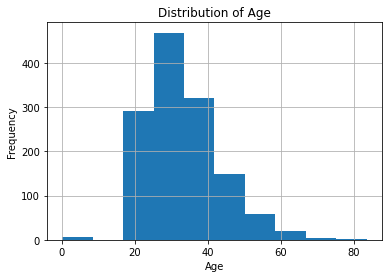

In [5]:
df.age.hist()
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Normally distributed with the average around 30. We don't see that many applicants in the pool below 20.

In [6]:
df['card'].value_counts()

yes    1023
no      296
Name: card, dtype: int64

In [7]:
# create subset for df with application not accepted.
reject_pop = df[df['card'] == 'no']

In [12]:
reject_pop['card'].value_counts()

no    296
Name: card, dtype: int64

In [9]:
# calculate population standard deviation
pop_std = reject_pop.age.std()
pop_std

9.921287130955733

Let a random sample of 20 applicants who were rejected from a card equal:

In [13]:
n = 20
sample_0 = reject_pop.sample(n=n, random_state=185)

In [14]:
# calculate sample mean.
x_bar = sample_0.age.mean()
x_bar

29.462500499999994

This sample evidence casts doubt on validity of null hypothesis, since the mean is greater than hypothesized value of 25. But this discrepancy does not necessarily imply that the null hypothesis is false.

What if this is pure chance? We must evaluate the test statistic.

In [16]:
def z_test(x_bar, mu_0, pop_std, n):
  """
  Formula for z test using the sample mean
  """
  sqrt_n = math.sqrt(n)
  z = (x_bar - mu_0)/(pop_std/sqrt_n)
  return z

In [17]:
# calculate the test statistic
z_score = z_test(x_bar, mu_0, pop_std, n)
z_score

2.011524177441188

Find the p-value.

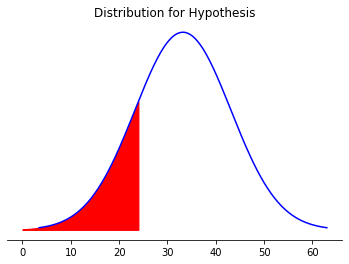

In [18]:
fig, ax = plt.subplots()
# calculate mean and std
mean=reject_pop.age.mean()
std=pop_std
x=np.linspace(mean-3*std, mean+3*std,250)
iq=stats.norm(mean,std)
plt.plot(x,iq.pdf(x),'b')

px=np.arange(0,mu_0,1)
plt.fill_between(px,iq.pdf(px),color='r')
plt.title('Distribution for Hypothesis')
plt.yticks([])
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [19]:
# convert z score to a p-value
p_value = stats.norm.sf(abs(z_score)) #one-sided
p_value

0.02213505959365852

This survival function is equivalent to 1 - cdf

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [20]:
1 - stats.norm.cdf(abs(z_score))

0.022135059593658468

In [21]:
print(f"When the null hypothesis is true, there is only a {round(p_value*100,2)}% chance that the sample mean will be 25 or less. This seems like a small chance. ")

When the null hypothesis is true, there is only a 2.21% chance that the sample mean will be 25 or less. This seems like a small chance. 


Is this small enough to reject the null hypothesis in favor of the alternative?

p-value is the observed probability of making a Type I error. Recall

- Reject the null hypothesis if the p-value < α, or

- Do not reject the null hypothesis if the p-value ≥ α


In [22]:
print(f"Given the p-value of {round(p_value,5)}, if we decide to reject the null hypothesis, there is a {round(p_value*100,2)}% chance that our decision will be erroneous.")

Given the p-value of 0.02214, if we decide to reject the null hypothesis, there is a 2.21% chance that our decision will be erroneous.


In [23]:
alpha = .05

In [27]:
p_value

0.02213505959365852

In [24]:
if  p_value <= alpha:
    # we are done...
    print("In accordance with Null Hypothesis, we fail to reject the null hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")

In accordance with Null Hypothesis, we fail to reject the null hypothesis.


Our sample data is in accordance with the null hypothesis, since the sample mean was 29, which is greater than 25. Therefore there is not enough evidence to reject the null hypothesis.

### Example 9.7
"A research analyst disputes a trade group's prediction that back-to-school spending will average \$ 606.40 per family this year." 

Experiment tested a simple random sample of 30 households with school-age children.

Calcualted sample mean of \$622.85

Assume normally distributed with a population standard deviation of \$65.

Conduct the signifance threshold at %5 level.

In [28]:
# example from textbook
mu_0 = 606.40
n = 30
x_bar = 622.85
pop_std = 65

alpha = 0.05

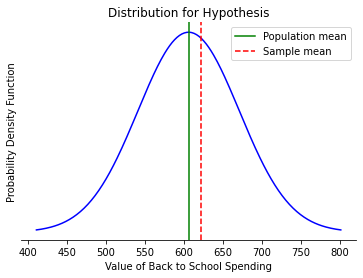

In [39]:
# plot it
fig, ax = plt.subplots()
mean=mu_0
std=pop_std
x=np.linspace(mean-3*std, mean+3*std,250)
iq=stats.norm(mean,std)
plt.plot(x,iq.pdf(x),'b')

plt.axvline(x=mean, color='g', linestyle='-', label='Population mean')
plt.axvline(x=x_bar, color='r', linestyle='--', label='Sample mean')
plt.legend()
plt.title('Distribution for Hypothesis')
plt.yticks([])
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Value of Back to School Spending')
plt.ylabel('Probability Density Function')
plt.show()

Interpretation: there is a .95 probability that the mean spending will be between \$599.59 and below \$646.11.

H<sub>0</sub>
 :  μ = 606.40

H<sub>A</sub> : μ ≠ 606.40

α = 0.05

In [30]:
x_bar

622.85

In [31]:
z_score = z_test(x_bar, mu_0, pop_std, n)
z_score

1.3861593955323088

In [37]:
(1 - stats.norm.cdf(abs(z_score))) * 2

0.165698237086779

In [35]:
# convert z score to a p-value
p_value = stats.norm.sf(abs(z_score)) * 2 #twosided
p_value

0.1656982370867791

In [38]:
if  p_value > alpha:
    # we are done...
    print("In accordance with Null Hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")

In accordance with Null Hypothesis


Since 0.1657 > 0.05, we fail to reject H0. Therefore, at the 5% significance level, we cannot conclude that average back-to-school spending differs from $606.40 per family this year. The sample data do not support the research analyst’s claim.

Use confidence interval approach to conduct the hypothesis test.

In [40]:
# make function that uses the z-score
upper_bound = x_bar+1.96*(pop_std/math.sqrt(n))
lower_bound = x_bar-1.96*(pop_std/math.sqrt(n))

In [41]:
f"Interpretation: there is a .95 probability that the mean spending will be\
 between ${round(lower_bound,2)} and below ${round(upper_bound,2)}."

'Interpretation: there is a .95 probability that the mean spending will be between $599.59 and below $646.11.'

Since x_bar of 622.85 falls between the 95% confidence interval, we do not reject the null hypothesis. Same outcome as p-value approach, sample data do not support research analyst's claim that average spending differs from $606.40 per family this year.

## Extra Credit:

Student is concerned that 80% of applicants will be approved for a credit card because of an annual income greater than $50,000.

- State the null and alternative hypothesis, confidence interval
- Find the value of the test statistic and the p-value
- Can you conclude that the claim is supported by the data?
- Interpret your results


(5 points)